# (01) Neural results ($ skip + 0.1 * x \dots$ ```KABA```)

**Motivation**: Fits on ```KABA``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
fits = [
    'fixate1_z-14x[5,10,20]_k-32_d-17_enc(2x2)-dec(2x1)-pre(1x3)-post(1x3)_wn/wnfix_ep500-b1200-lr(0.002)_beta(0.1:0x0.3)_gr(250.0)_(2023_06_19,22:17)',
    'fixate1_z-14x[5,10,20]_k-32_d-17_enc(2x2)-dec(2x1)-pre(1x3)-post(1x3)_wn/wnfix_ep500-b1200-lr(0.002)_beta(0.1:0x0.3)_gr(250.0)_(2023_06_19,22:17)',
]
save_script_neural(fits, 'cuda:1', args=['--which enc --reservoir', '--which dec --reservoir'])

[PROGRESS] 'run_neuron_kaba.txt' saved at
/home/hadi/Dropbox/git/_MTMST/scripts

## Current

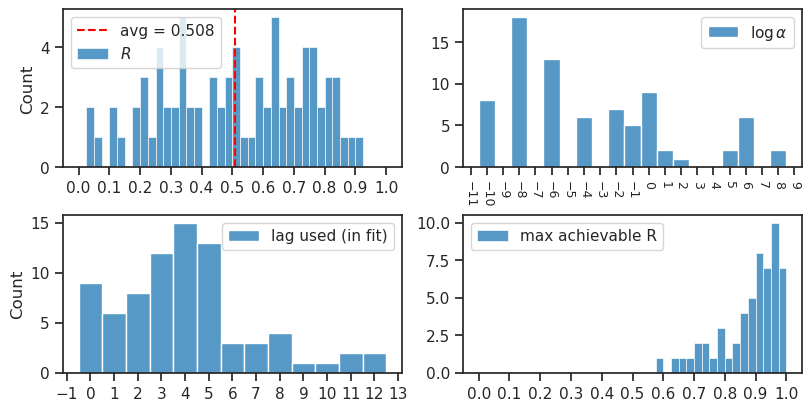

79

In [3]:
fit_name = 'reservoir_nf-7360_beta-0.1_(2023_07_03,10:13)'
df, df_all, ro_all, args, tr = summarize_neural_fits(fit_name)

_ = show_neural_results(df)
len(df)

In [4]:
inds = df['perf'].argsort()[::-1]
df.iloc[inds]

,category,nf,beta,root,expt,cell,perf,max_perf,log_alpha,best_lag,pix_rank,pix_count,top_lag
28,reservoir,7360,0.1,YUWEI,clu116,0,0.914094,0.835483,-6.0,2,0,9,4
42,reservoir,7360,0.1,YUWEI,clu209,1,0.898913,0.923722,0.0,4,1,0,3
69,reservoir,7360,0.1,YUWEI,clu267,4,0.859483,0.979806,-10.0,5,1,0,3
44,reservoir,7360,0.1,YUWEI,clu209,12,0.846052,0.946263,-2.0,4,1,0,3
43,reservoir,7360,0.1,YUWEI,clu209,4,0.845735,0.933615,-6.0,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,reservoir,7360,0.1,YUWEI,clu036,0,0.121077,NaN,-6.0,4,0,13,6
38,reservoir,7360,0.1,YUWEI,clu180,0,0.113681,NaN,-2.0,12,1,0,12
13,reservoir,7360,0.1,YUWEI,clu069,0,0.073251,NaN,-6.0,5,2,0,4
31,reservoir,7360,0.1,YUWEI,clu131,0,0.035402,0.843686,-6.0,7,2,0,5


## ```which='enc'/'dec'``` results

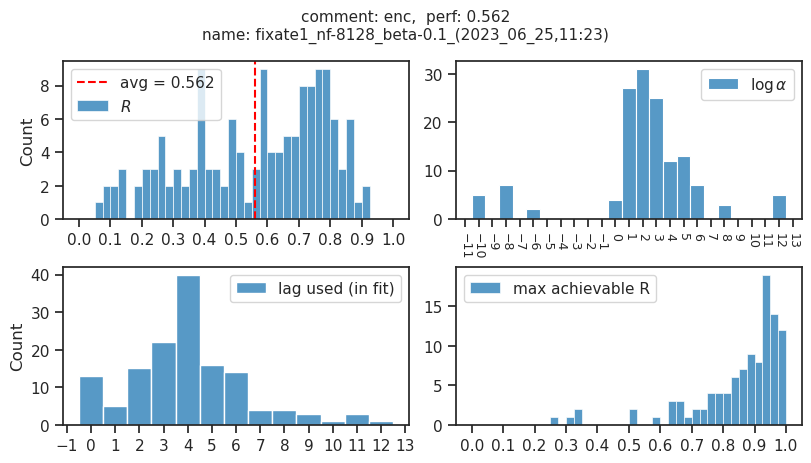

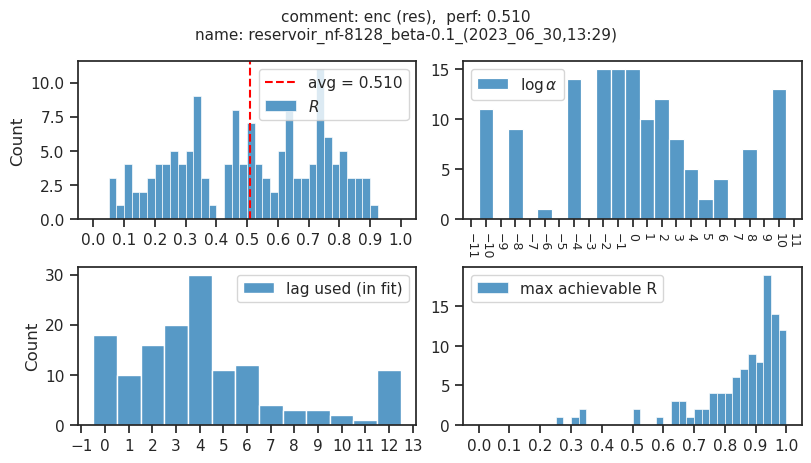

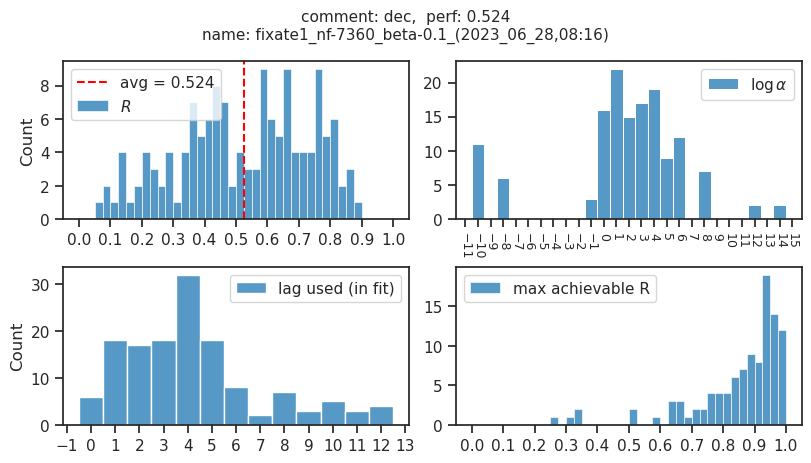

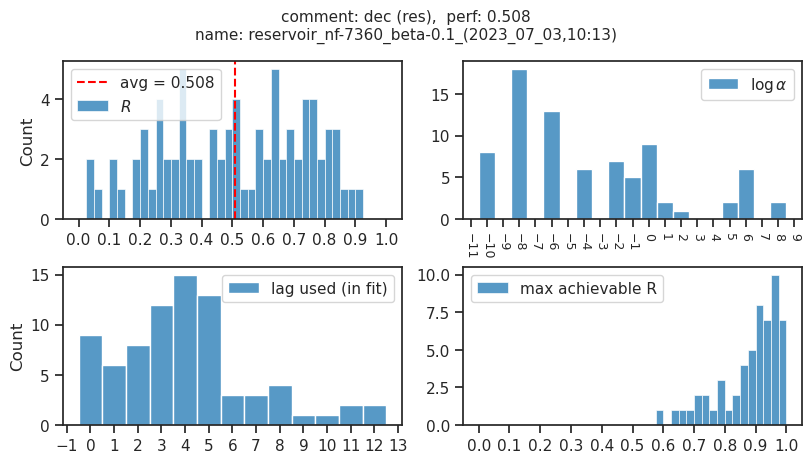

In [5]:
fits = {
    'enc': 'fixate1_nf-8128_beta-0.1_(2023_06_25,11:23)',
    'enc (res)': 'reservoir_nf-8128_beta-0.1_(2023_06_30,13:29)',
    'dec': 'fixate1_nf-7360_beta-0.1_(2023_06_28,08:16)',
    'dec (res)': 'reservoir_nf-7360_beta-0.1_(2023_07_03,10:13)',
}
for k, fit_name in fits.items():
    df, df_all, ro_all, args, tr = summarize_neural_fits(fit_name)
    fig, _ = show_neural_results(df, display=False)
    fig.suptitle(f"comment: {k},  perf: {df['perf'].mean():0.3f}\nname: {fit_name}", y=1.12, fontsize=11)
    display(fig)

## ```which='z'``` results

### Weight norm vs. weight reg results

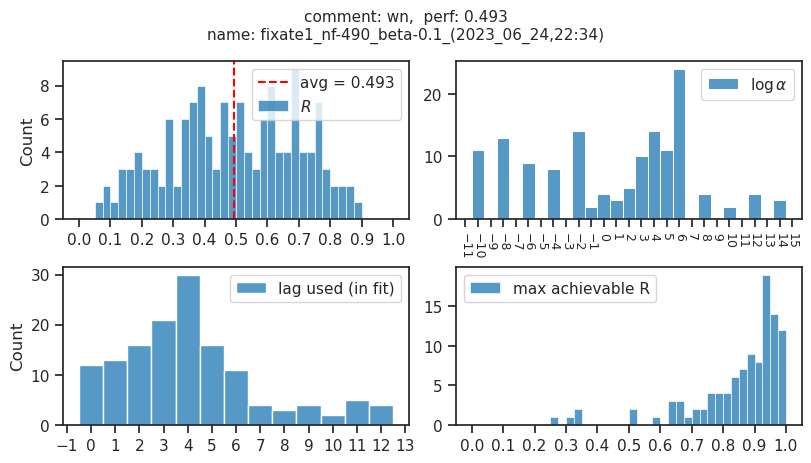

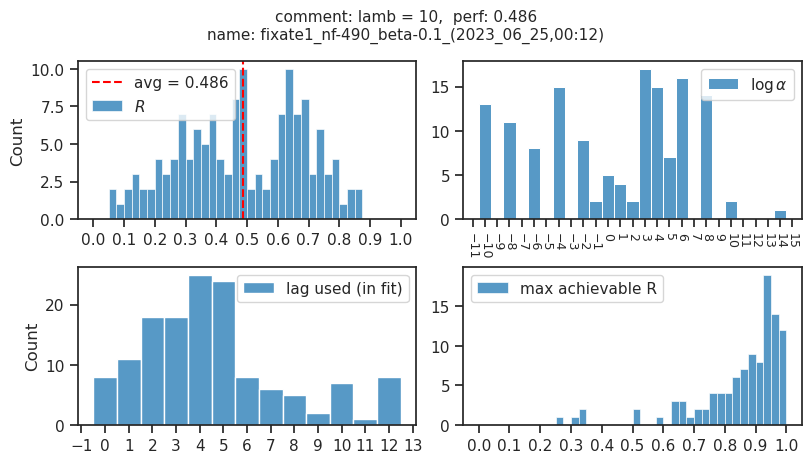

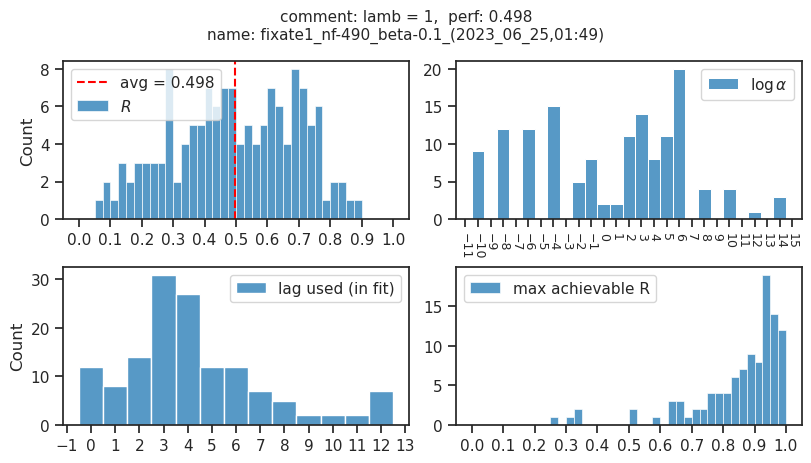

In [6]:
fits = {
    'wn': 'fixate1_nf-490_beta-0.1_(2023_06_24,22:34)',
    'lamb = 10': 'fixate1_nf-490_beta-0.1_(2023_06_25,00:12)',
    'lamb = 1': 'fixate1_nf-490_beta-0.1_(2023_06_25,01:49)',
}
for k, fit_name in fits.items():
    df, df_all, ro_all, args, tr = summarize_neural_fits(fit_name)
    fig, _ = show_neural_results(df, display=False)
    fig.suptitle(f"comment: {k},  perf: {df['perf'].mean():0.3f}\nname: {fit_name}", y=1.12, fontsize=11)
    display(fig)

### Etc results

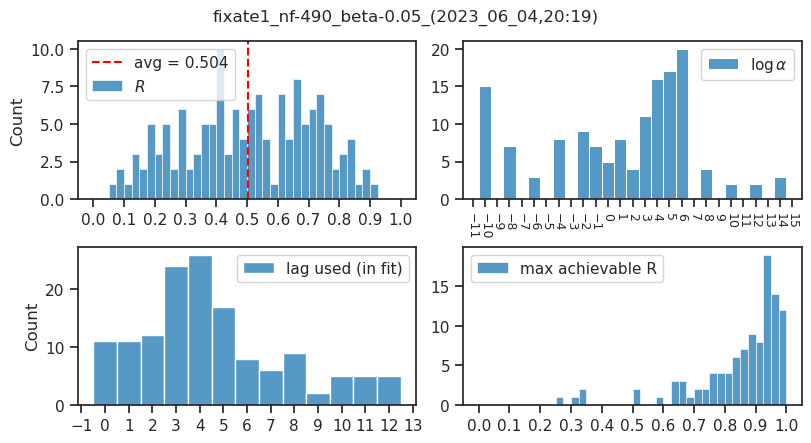

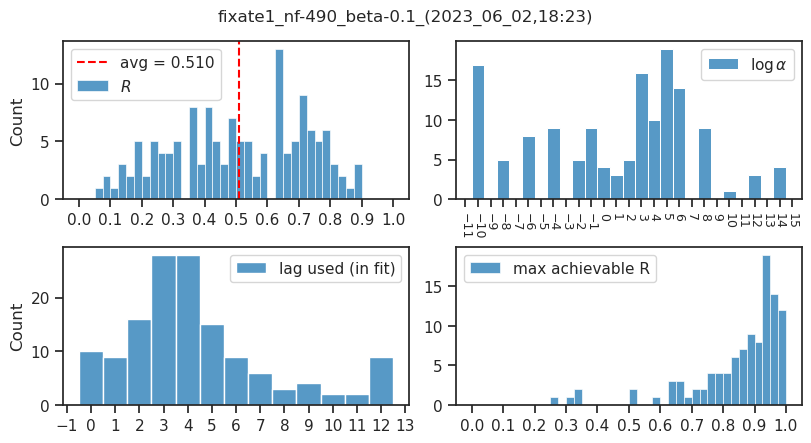

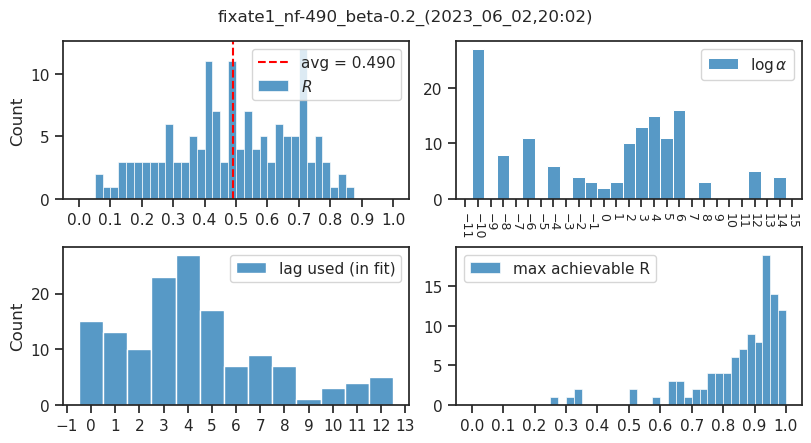

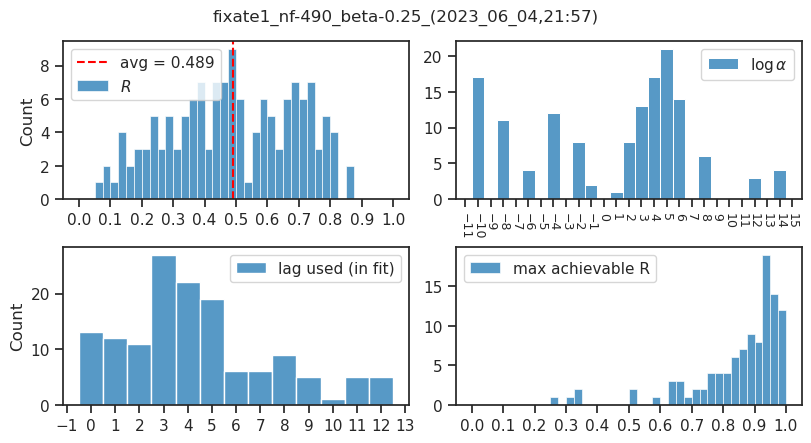

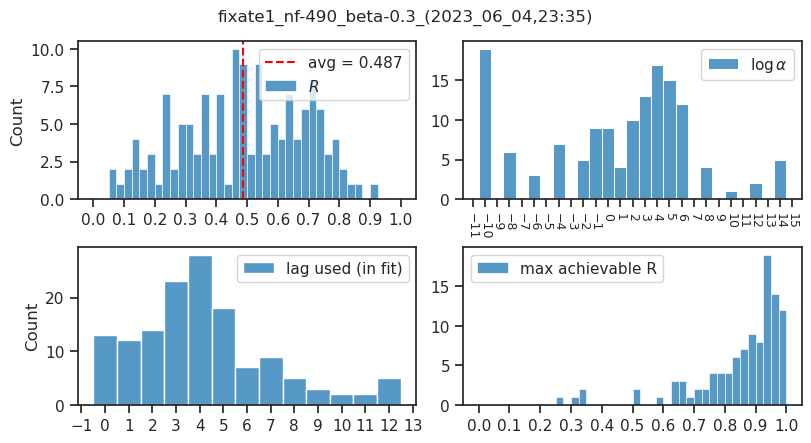

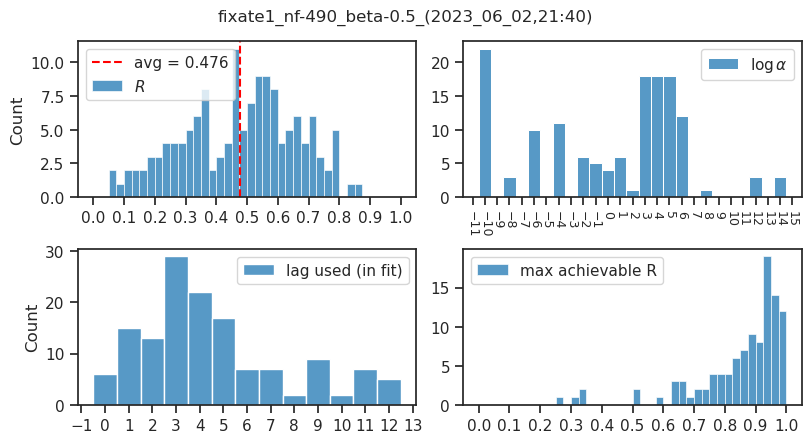

In [7]:
fits = [
    'fixate1_nf-490_beta-0.05_(2023_06_04,20:19)',
    'fixate1_nf-490_beta-0.1_(2023_06_02,18:23)',
    'fixate1_nf-490_beta-0.2_(2023_06_02,20:02)',
    'fixate1_nf-490_beta-0.25_(2023_06_04,21:57)',
    'fixate1_nf-490_beta-0.3_(2023_06_04,23:35)',
    'fixate1_nf-490_beta-0.5_(2023_06_02,21:40)',
]
for fit_name in fits:
    df, df_all, ro_all, args, tr = summarize_neural_fits(fit_name)
    fig, _ = show_neural_results(df, display=False)
    fig.suptitle(fit_name, y=1.07, fontsize=12)
    display(fig)

### ```dim=33``` results

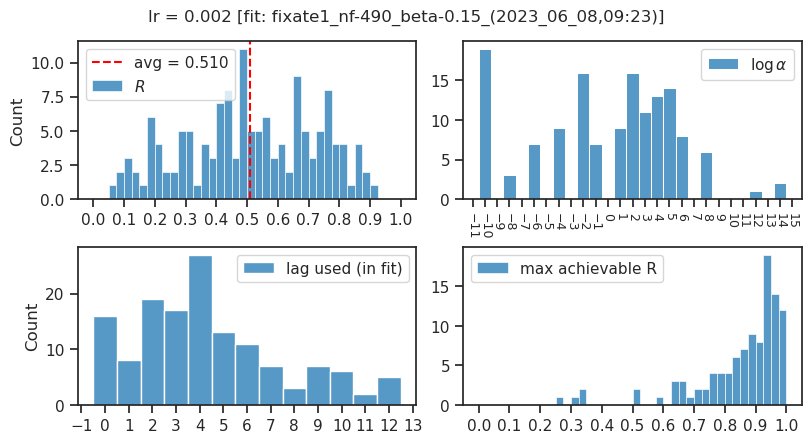

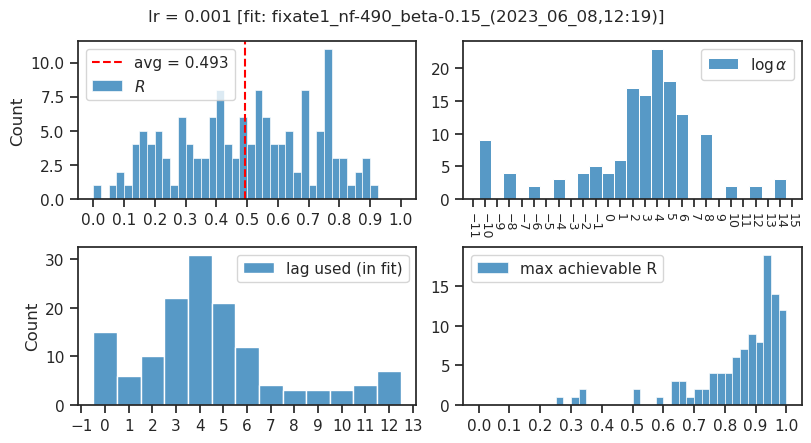

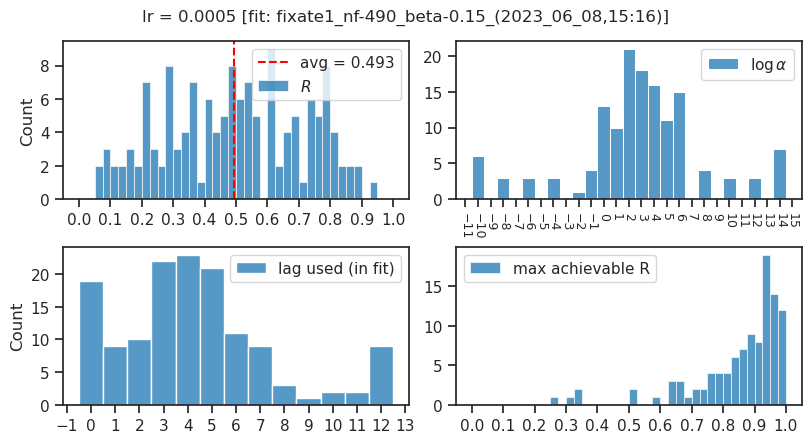

In [8]:
fits_dict = {
    0.002: 'fixate1_nf-490_beta-0.15_(2023_06_08,09:23)',
    0.001: 'fixate1_nf-490_beta-0.15_(2023_06_08,12:19)',
    0.0005: 'fixate1_nf-490_beta-0.15_(2023_06_08,15:16)',
}
for lr, fit_name in fits_dict.items():
    df, df_all, ro_all, args, tr = summarize_neural_fits(fit_name)
    fig, _ = show_neural_results(df, display=False)
    fig.suptitle(f"lr = {lr} [fit: {fit_name}]", y=1.07, fontsize=12)
    display(fig)